# Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

# Load Dataset- Fraud

In [61]:
df=pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Basic Information

In [3]:
df.shape

(6362620, 11)

- There are 6362620 rows and 11 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Dropping Columns

In [62]:
df=df.drop(columns=['nameOrig','nameDest'])

- These columns have no logical relationship with the target so we drop them

In [22]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


# Data Preprocessing

## Check Missing Values

In [23]:
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

- There are no missing values in data

## Check Duplicate Data

In [13]:
df.duplicated().sum()

0

- There are no duplicates in data

## Encoding

- Converting the non-numeric columns to numeric

In [63]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

### One Hot Encoder

In [64]:
df=pd.get_dummies(df,columns=['type'])

In [26]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,0,1,0


### Dummy Variable

- To handle multicollinearity problem we drop any one dummy variable

In [65]:
df=df.drop(columns=['type_TRANSFER'])

In [28]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,0,1
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,0,1
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,1,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,0,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   isFlaggedFraud  int64  
 8   type_CASH_IN    uint8  
 9   type_CASH_OUT   uint8  
 10  type_DEBIT      uint8  
 11  type_PAYMENT    uint8  
dtypes: float64(5), int64(3), uint8(4)
memory usage: 412.6 MB


- We have successfully converted all non-numeric columns to numeric columns

## Check for Outliers

### Plotting Distribution

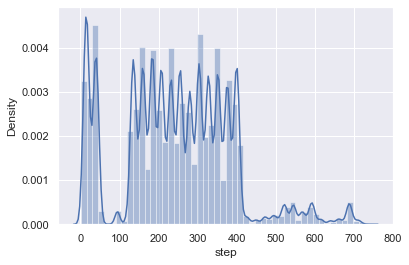

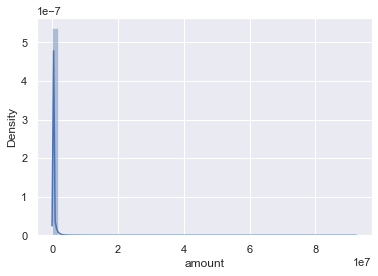

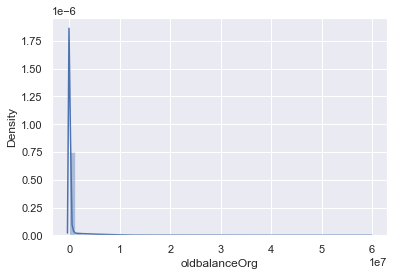

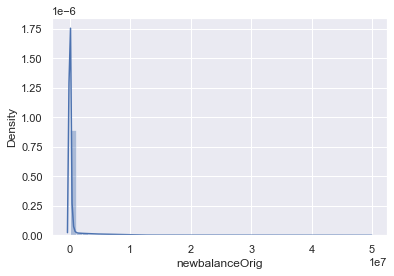

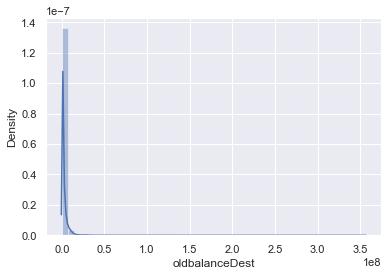

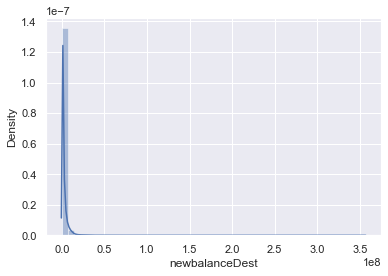

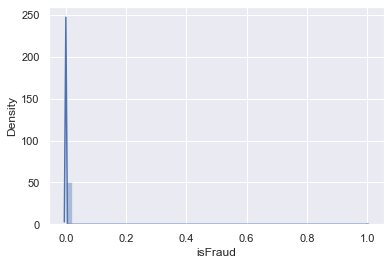

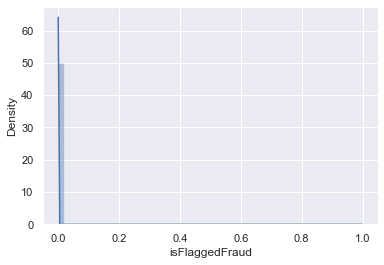

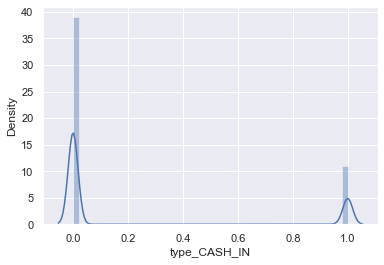

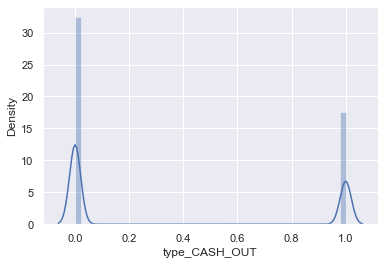

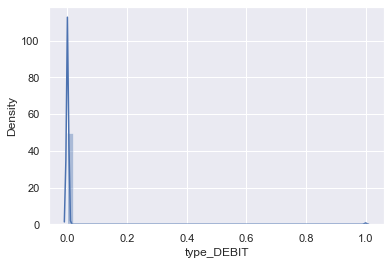

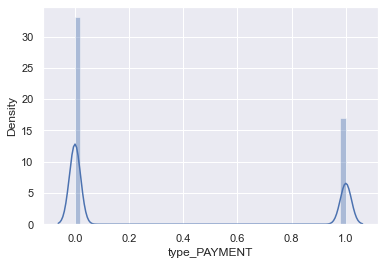

In [30]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df.columns):
    distplots(i)

### Plotting Boxplot

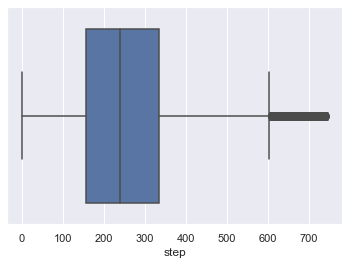

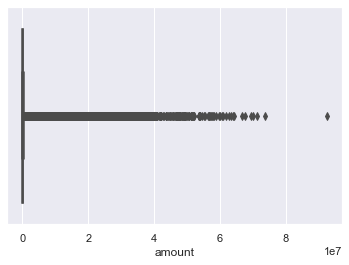

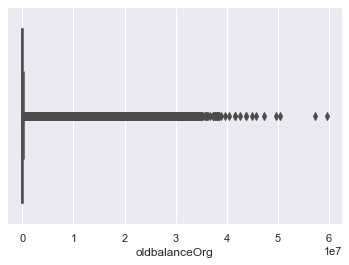

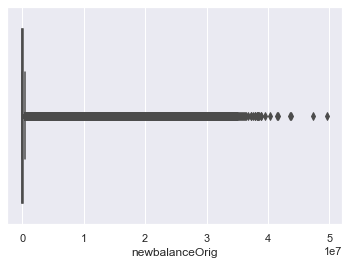

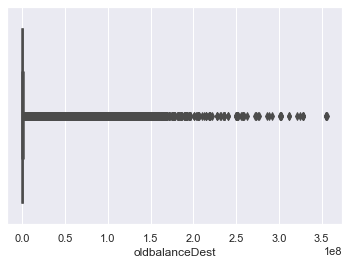

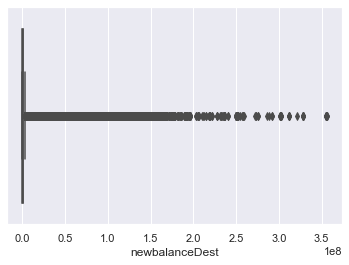

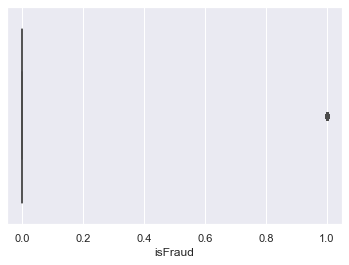

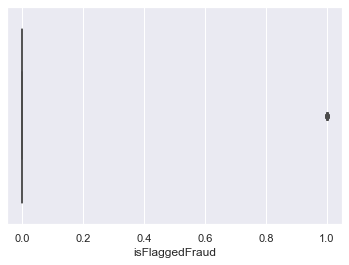

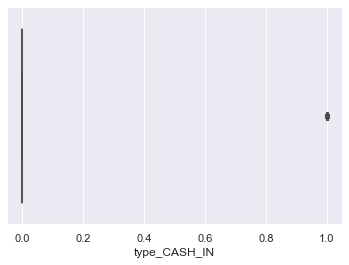

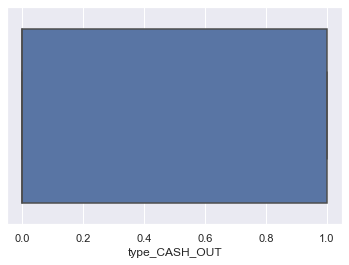

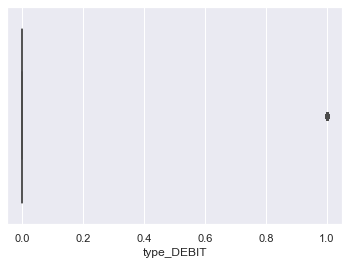

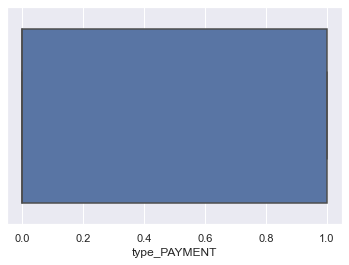

In [31]:
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.columns):
    boxplots(i)

- We do not need to handle outliers in case of Logistic Regression as not much sensitive to outliers

# Correlation

## Check for Multicollinearity

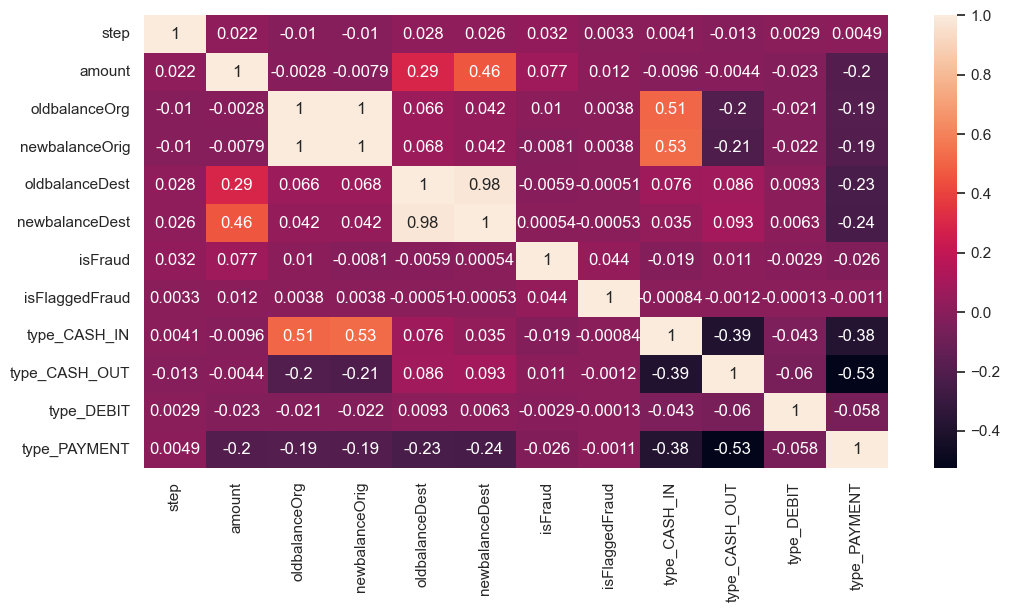

In [49]:
plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(df.corr(),annot=True)
plt.show()

## Imbalance Data Treatment

In [66]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

- Data is imbalanced so we need to balance the data by using oversampling technique

### Split the data into dependent and independent variable

In [67]:
x=df.drop(columns=['isFraud'])
y=df.isFraud

### OverSampling

In [68]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
x_over,y_over=ros.fit_resample(x,y)

In [69]:
y_over.value_counts()

0    6354407
1    6354407
Name: isFraud, dtype: int64

# Split the data into train and test

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_over,y_over,test_size=0.25,random_state=102)

# Building Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [78]:
lr.coef_

array([[-2.34696580e-03,  2.33290824e-06,  2.85214215e-05,
        -3.03995660e-05,  1.42727757e-05, -1.43091772e-05,
         1.00163612e-07, -7.88080966e-07, -1.94607536e-06,
        -1.68428958e-07, -1.03901377e-05]])

In [77]:
lr.intercept_

array([-1.18724031e-05])

# Predicting Values

In [72]:
y_pred=lr.predict(x_test)

In [75]:
y_pred_train=lr.predict(x_train)

# Validating the model

In [18]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## Test Accuracy

In [73]:
accuracy_score(y_test,y_pred)

0.904402739012037

## Training Accuracy

In [76]:
accuracy_score(y_train,y_pred_train)

0.9042496493247206

# Performance Metrics

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91   1589882
           1       0.91      0.90      0.90   1587322

    accuracy                           0.90   3177204
   macro avg       0.90      0.90      0.90   3177204
weighted avg       0.90      0.90      0.90   3177204



## Confusion Matrix

In [80]:
print(confusion_matrix(y_test,y_pred))

[[1448937  140945]
 [ 162787 1424535]]


# Conclusion

- There is no underfitting or overfitting problem in the model.
- Test Accuracy- 90%
- As accuracy and other performance metrics show us that model accuracy is 90% then we can say it is good model.
- We have successfully built the model for predicting the fraud.
- Now we can feed the new test data to the trained model to get the prediction.